In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from mpl_toolkits.mplot3d import Axes3D

In [3]:
img = cv2.imread('puppy.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
graySmall = gray

<Figure size 432x288 with 0 Axes>

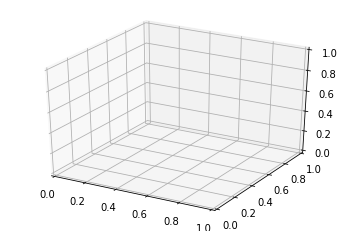

In [5]:
# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:graySmall.shape[0], 0:graySmall.shape[1]]
# create the figure
fig = plt.figure()
ax = plt.figure().gca(projection='3d')
#ax.plot_surface(xx, yy, graySmall, rstride=1, cstride=1, linewidth=0)
plt.show()

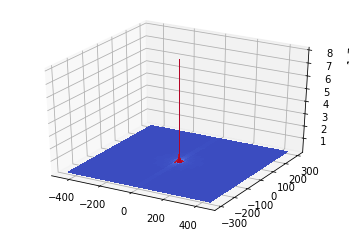

In [10]:
# Take the 2-D DFT and plot the magnitude of the corresponding Fourier coefficients
F2_graySmall = np.fft.fft2(graySmall)
fig = plt.figure()
ax = fig.gca(projection='3d')
Y = (np.linspace(-int(graySmall.shape[0]/2), int(graySmall.shape[0]/2)-1, graySmall.shape[0]))
X = (np.linspace(-int(graySmall.shape[1]/2), int(graySmall.shape[1]/2)-1, graySmall.shape[1]))
X, Y = np.meshgrid(X, Y)
# Standard plot: range of values makes small differences hard to see
ax.plot_surface(X, Y, np.fft.fftshift(np.abs(F2_graySmall)), cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
# Log(magnitude + 1) plot: shrinks the range so that small differences are visible
ax.plot_surface(X, Y, np.fft.fftshift(np.log(np.abs(F2_graySmall)+1)), cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
plt.savefig('3-D_fourier_coefficients.jpg')
# Plot the magnitude as image
plt.show()

In [ ]:
# Plot the magnitude and the log(magnitude + 1) as images (view from the top)
magnitudeImage = np.fft.fftshift(np.abs(F2_graySmall))
magnitudeImage = magnitudeImage / magnitudeImage.max()   # scale to [0, 1]
magnitudeImage = ski.img_as_ubyte(magnitudeImage)
cv2.imshow('Magnitude plot', magnitudeImage)
logMagnitudeImage = np.fft.fftshift(np.log(np.abs(F2_graySmall)+1))
logMagnitudeImage = logMagnitudeImage / logMagnitudeImage.max()   # scale to [0, 1]
logMagnitudeImage = ski.img_as_ubyte(logMagnitudeImage)
cv2.imshow('Log Magnitude plot', logMagnitudeImage)
cv2.waitKey(0)

In [7]:
gray.shape

(600, 900)

In [8]:
for k in range(0, int(gray.shape[0]/2)):
    # Truncate frequencies and then plot the resulting function in real space
    Trun_F_colData = F_colData.copy()
    Trun_F_colData[k+1:len(Trun_F_colData)-k] = 0
    trun_colData = np.fft.ifft(Trun_F_colData)
    # Plot
    xvalues = np.linspace(0, len(trun_colData) - 1, len(trun_colData))
    plt.plot(xvalues, colData, 'b')
    plt.plot(xvalues, trun_colData, 'r')
    plt.title('k = 0 : ' + str(k))
    #plt.savefig('/Users/paucavp1/Temp/rec_function'+str(k)+'.png', bbox_inches='tight')
    plt.show()
    plt.clf()

NameError: name 'F_colData' is not defined